# Import Libraries

In [2]:

%pip install tensorflow 
%pip install opencv-python
%pip install torchvision
%pip install tqdm scikit-learn

import os
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import torch
import torch.nn as nn
import torch.optim as optim



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [129]:
!pip install matplotlib seaborn


In [128]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow-cpu


Note: you may need to restart the kernel to use updated packages.


# Load Dataset

In [102]:

import pandas as pd

meta_path = r"C:\Adeeda\Breast cancer\csv\meta.csv"
dicom_info_path = r"C:\Adeeda\Breast cancer\csv\dicom_info.csv"
train_path = r"C:\Adeeda\Breast cancer\csv\mass_case_description_train_set.csv"
test_path = r"C:\Adeeda\Breast cancer\csv\mass_case_description_test_set.csv"

mass_train = pd.read_csv(train_path)
mass_test = pd.read_csv(test_path)

mass_train.fillna(method='bfill', inplace=True)
mass_test.fillna(method='bfill', inplace=True)

# Combine
full_data = pd.concat([mass_train, mass_test], axis=0).reset_index(drop=True)


C:\Users\adeed\AppData\Local\Temp\ipykernel_5944\1314980157.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mass_train.fillna(method='bfill', inplace=True)
C:\Users\adeed\AppData\Local\Temp\ipykernel_5944\1314980157.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mass_test.fillna(method='bfill', inplace=True)


# Fix Paths

In [103]:
df_meta= pd.read_csv('\Adeeda\Breast cancer\csv\meta.csv')
df_meta.head()

,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,Visibility,ImageCount
0,1.3.6.1.4.1.9590.100.1.2.117041576511324414842...,1.3.6.1.4.1.9590.100.1.2.229361142710768138411...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
1,1.3.6.1.4.1.9590.100.1.2.438738396107617880132...,1.3.6.1.4.1.9590.100.1.2.195593486612988388325...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
2,1.3.6.1.4.1.9590.100.1.2.767416741131676463382...,1.3.6.1.4.1.9590.100.1.2.257901172612530623323...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
3,1.3.6.1.4.1.9590.100.1.2.296931352612305599800...,1.3.6.1.4.1.9590.100.1.2.109468616710242115222...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
4,1.3.6.1.4.1.9590.100.1.2.436657670120353100077...,1.3.6.1.4.1.9590.100.1.2.380627129513562450304...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2


In [104]:
df_dicom = pd.read_csv('C:\Adeeda\Breast cancer\csv\dicom_info.csv')
df_dicom.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [105]:
df_dicom.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

In [106]:
cropped_images = df_dicom[df_dicom.SeriesDescription=='cropped images'].image_path
cropped_images.head(5)

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [107]:
full_mammo = df_dicom[df_dicom.SeriesDescription=='full mammogram images'].image_path
full_mammo.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [108]:
roi_img = df_dicom[df_dicom.SeriesDescription=='ROI mask images'].image_path
roi_img.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [109]:
imdir = '../input/cbis-ddsm-breast-cancer-image-dataset/jpeg'

In [110]:
cropped_images = cropped_images.replace('CBIS-DDSM/jpeg', imdir, regex=True)
full_mammo = full_mammo.replace('CBIS-DDSM/jpeg', imdir, regex=True)
roi_img = roi_img.replace('CBIS-DDSM/jpeg', imdir, regex=True)

# view new paths
print('Cropped Images paths:\n')
print(cropped_images.iloc[0])
print('Full mammo Images paths:\n')
print(full_mammo.iloc[0])
print('ROI Mask Images paths:\n')
print(roi_img.iloc[0])

Cropped Images paths:

../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
Full mammo Images paths:

../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg
ROI Mask Images paths:

../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg


In [111]:
full_mammo_dict = dict()
cropped_images_dict = dict()
roi_img_dict = dict()

for dicom in full_mammo:
    key = dicom.split("/")[4]
    full_mammo_dict[key] = dicom
for dicom in cropped_images:
    key = dicom.split("/")[4]
    cropped_images_dict[key] = dicom
for dicom in roi_img:
    key = dicom.split("/")[4]
    roi_img_dict[key] = dicom

# view keys
next(iter((full_mammo_dict.items())))

('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849',
 '../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg')

In [112]:
mass_train = pd.read_csv('C:\Adeeda\Breast cancer\csv\mass_case_description_train_set.csv')
mass_test = pd.read_csv('C:\Adeeda\Breast cancer\csv\mass_case_description_test_set.csv')

mass_train.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [113]:
def fix_image_path(data):
    """correct dicom paths to correct image paths"""
    for index, img in enumerate(data.values):
        img_name = img[11].split("/")[2]
        data.iloc[index,11] = full_mammo_dict[img_name]
        img_name = img[12].split("/")[2]
        data.iloc[index,12] = cropped_images_dict[img_name]
        img_name = img[13].split("/")[2]
        data.iloc[index,13] = roi_img_dict[img_name]
        
# apply to datasets
fix_image_path(mass_train)
fix_image_path(mass_test)

In [115]:
mass_train = mass_train.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

mass_train.head(5)

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...


In [117]:
mass_train['mass_shape'] = mass_train['mass_shape'].bfill()
mass_train['mass_margins'] = mass_train['mass_margins'].bfill()

#check null values
mass_train.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [118]:
print(f'Shape of mass_train: {mass_train.shape}')
print(f'Shape of mass_test: {mass_test.shape}')

Shape of mass_train: (1318, 14)
Shape of mass_test: (378, 14)


In [119]:
mass_test = mass_test.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

In [120]:
mass_test['mass_margins'] = mass_test['mass_margins'].bfill()

#check null values
mass_test.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [121]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [122]:
print(mass_train['cropped_image_file_path'].head())

0    ../input/cbis-ddsm-breast-cancer-image-dataset...
1    ../input/cbis-ddsm-breast-cancer-image-dataset...
2    ../input/cbis-ddsm-breast-cancer-image-dataset...
3    ../input/cbis-ddsm-breast-cancer-image-dataset...
4    ../input/cbis-ddsm-breast-cancer-image-dataset...
Name: cropped_image_file_path, dtype: object


In [123]:
print(mass_train['ROI_mask_file_path'].head())

0    ../input/cbis-ddsm-breast-cancer-image-dataset...
1    ../input/cbis-ddsm-breast-cancer-image-dataset...
2    ../input/cbis-ddsm-breast-cancer-image-dataset...
3    ../input/cbis-ddsm-breast-cancer-image-dataset...
4    ../input/cbis-ddsm-breast-cancer-image-dataset...
Name: ROI_mask_file_path, dtype: object


In [150]:
print(mass_train.shape)

(1318, 15)


In [152]:
print(mass_test.shape)

(378, 15)


In [162]:
mass_train

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path,label
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,1.0
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,1.0
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,0.0
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,0.0
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,1.0
1314,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,1.0
1315,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,1.0
1316,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,1.0


In [127]:
# Combine datasets
full_data = pd.concat([mass_train, mass_test], axis=0).reset_index(drop=True)

# Shape and columns
print(f"Total samples: {full_data.shape[0]}")
print("Columns:", full_data.columns.tolist())


Total samples: 1696
Columns: ['patient_id', 'breast_density', 'left or right breast', 'image view', 'abnormality id', 'abnormality type', 'mass shape', 'mass margins', 'assessment', 'pathology', 'subtlety', 'image file path', 'cropped image file path', 'ROI mask file path']


# EDA

#  Dataset Overview

In [245]:
# Basic info
print("Train Set Shape:", mass_train.shape)
print("Test Set Shape:", mass_test.shape)

# Preview
display(mass_train.head())

# Data types & missing values
print("\nInfo:")
mass_train.info()

print("\nMissing values:")
print(mass_train.isnull().sum())


Train Set Shape: (1318, 15)
Test Set Shape: (378, 15)


,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path,label
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,../input/cbis-ddsm-breast-cancer-image-dataset...,C:\Adeeda\Breast cancer\jpeg/1.3.6.1.4.1.9590....,../input/cbis-ddsm-breast-cancer-image-dataset...,1.0
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,../input/cbis-ddsm-breast-cancer-image-dataset...,C:\Adeeda\Breast cancer\jpeg/1.3.6.1.4.1.9590....,../input/cbis-ddsm-breast-cancer-image-dataset...,1.0
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,../input/cbis-ddsm-breast-cancer-image-dataset...,C:\Adeeda\Breast cancer\jpeg/1.3.6.1.4.1.9590....,../input/cbis-ddsm-breast-cancer-image-dataset...,0.0
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,../input/cbis-ddsm-breast-cancer-image-dataset...,C:\Adeeda\Breast cancer\jpeg/1.3.6.1.4.1.9590....,../input/cbis-ddsm-breast-cancer-image-dataset...,0.0
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,../input/cbis-ddsm-breast-cancer-image-dataset...,C:\Adeeda\Breast cancer\jpeg/1.3.6.1.4.1.9590....,../input/cbis-ddsm-breast-cancer-image-dataset...,0.0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   patient_id               1318 non-null   object 
 1   breast_density           1318 non-null   int64  
 2   left_or_right_breast     1318 non-null   object 
 3   image_view               1318 non-null   object 
 4   abnormality_id           1318 non-null   int64  
 5   abnormality_type         1318 non-null   object 
 6   mass_shape               1318 non-null   object 
 7   mass_margins             1318 non-null   object 
 8   assessment               1318 non-null   int64  
 9   pathology                1318 non-null   object 
 10  subtlety                 1318 non-null   int64  
 11  image_file_path          1318 non-null   object 
 12  cropped_image_file_path  1318 non-null   object 
 13  ROI_mask_file_path       1318 non-null   object 
 14  label            

In [124]:
image_base_path = r"C:\Adeeda\Breast cancer\jpeg"

# Fix image paths for all 3 columns
mass_train['image_file_path'] = mass_train['image_file_path'].str.replace(
    '../input/cbis-ddsm-breast-cancer-image-dataset/jpeg',
    image_base_path,
    regex=False
)
mass_train['cropped_image_file_path'] = mass_train['cropped_image_file_path'].str.replace(
    '../input/cbis-ddsm-breast-cancer-image-dataset/jpeg',
    image_base_path,
    regex=False
)
mass_train['ROI_mask_file_path'] = mass_train['ROI_mask_file_path'].str.replace(
    '../input/cbis-ddsm-breast-cancer-image-dataset/jpeg',
    image_base_path,
    regex=False
)


Full Mammograms:



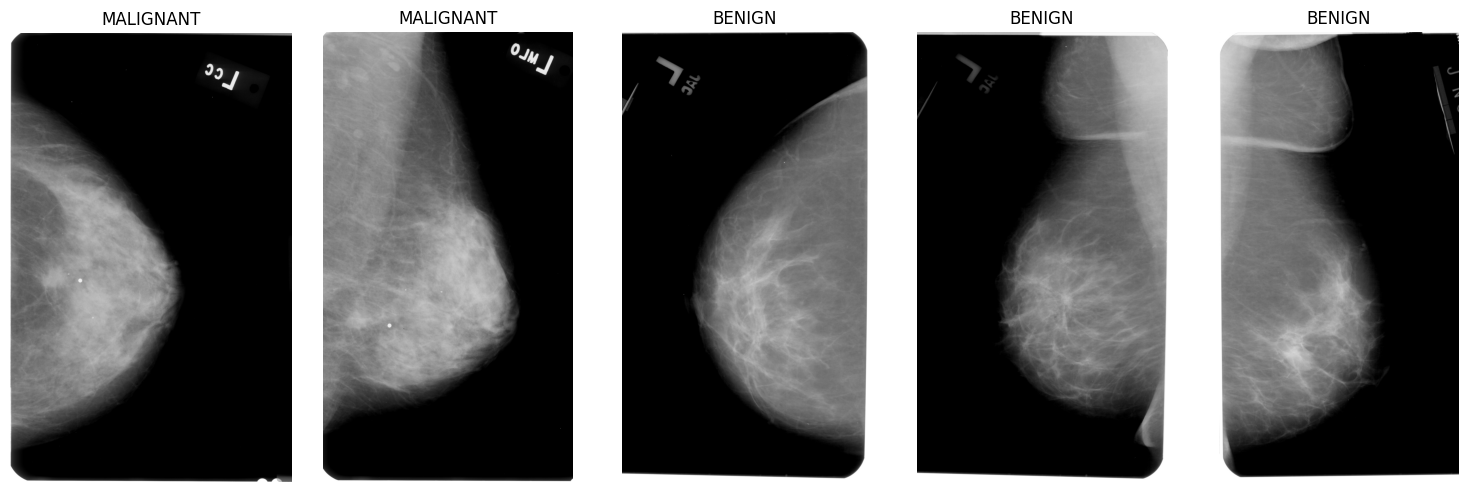

Cropped Mammograms:



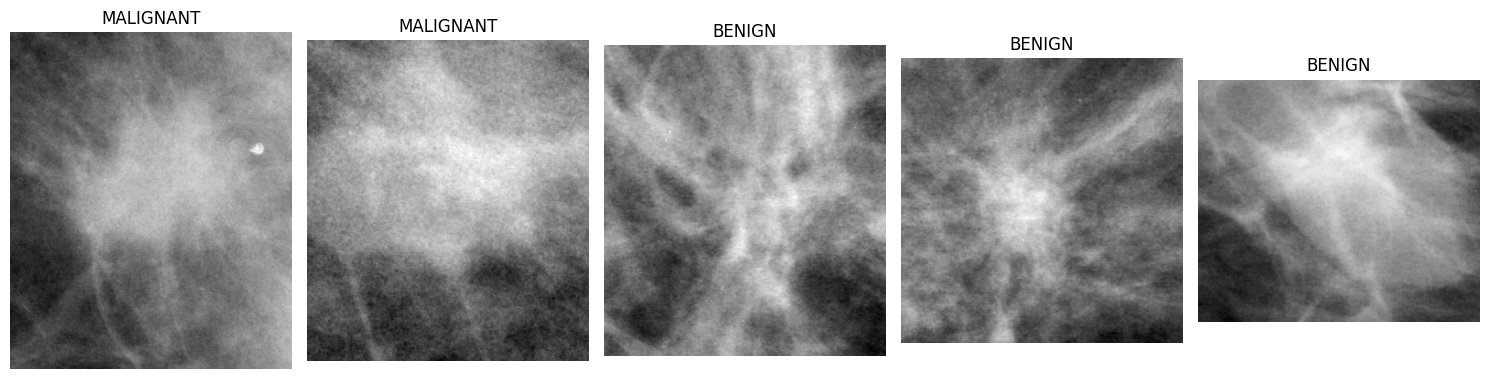

ROI mask:



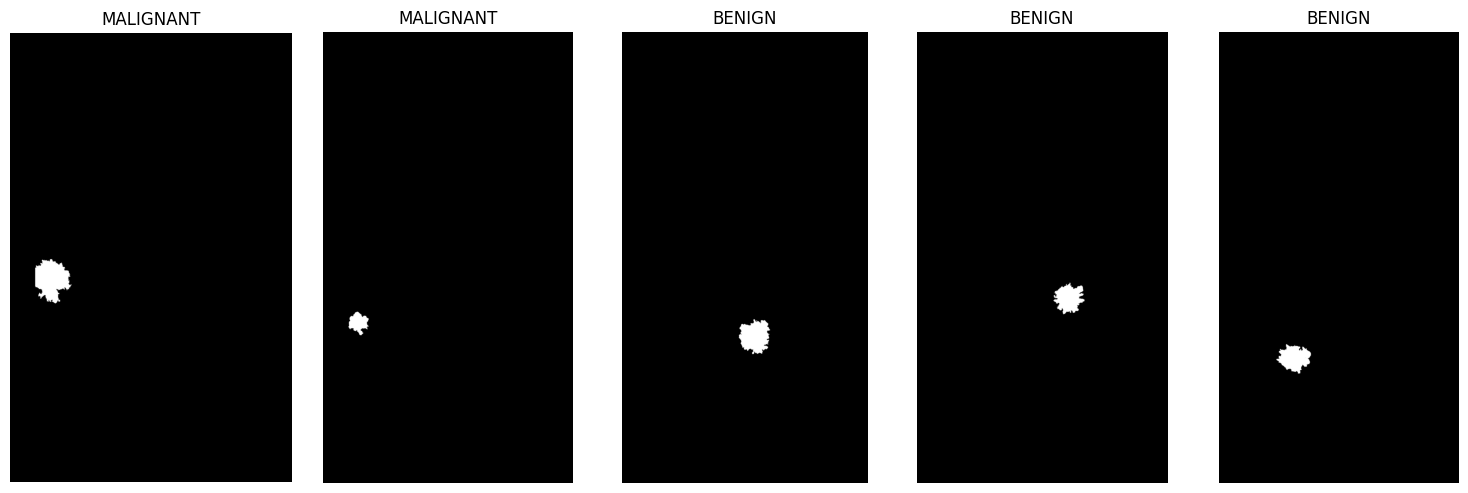

In [125]:
def display_images(column, number):
    # create figure and axes
    number_to_visualize = number
    rows = 1
    cols = number_to_visualize
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))

    shown = 0
    for index, row in mass_train.iterrows():
        if shown >= number_to_visualize:
            break
        image_path = row[column]
        if not os.path.exists(image_path):
            print(f"File not found: {image_path}")
            continue
        image = mpimg.imread(image_path)
        ax = axes[shown] if number_to_visualize > 1 else axes
        ax.imshow(image, cmap='gray')
        ax.set_title(f"{row['pathology']}")
        ax.axis('off')
        shown += 1
    plt.tight_layout()
    plt.show()

print('Full Mammograms:\n')
display_images('image_file_path', 5)
print('Cropped Mammograms:\n')
display_images('cropped_image_file_path', 5)
print('ROI mask:\n')
display_images('ROI_mask_file_path', 5)

#  Class Distribution

C:\Users\adeed\AppData\Local\Temp\ipykernel_5944\3214932310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=full_data, x='pathology', palette='Set2')


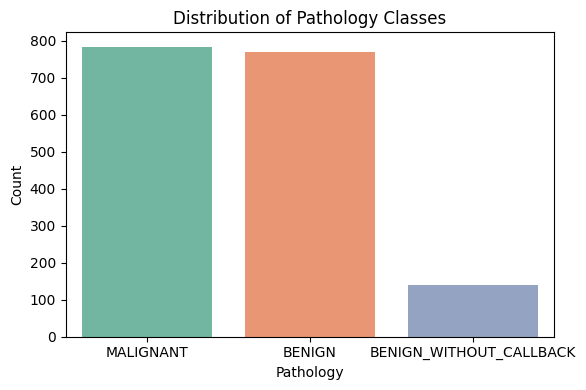

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=full_data, x='pathology', palette='Set2')
plt.title("Distribution of Pathology Classes")
plt.xlabel("Pathology")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# Mass Shape & Mass Margin distribution

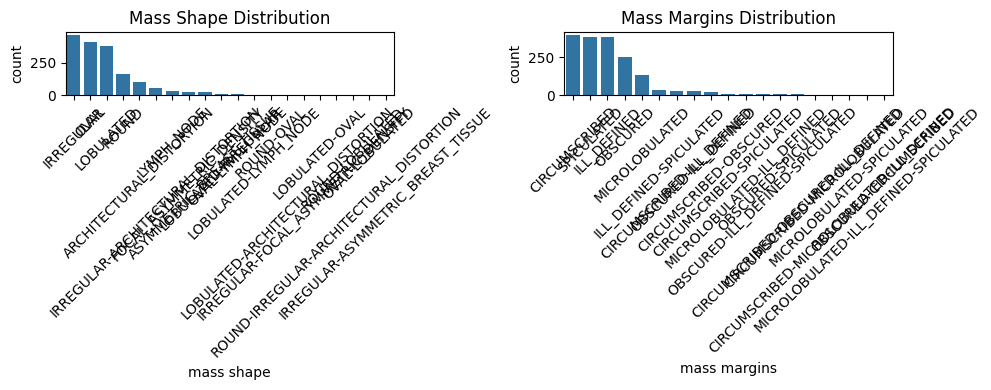

In [165]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(data=full_data, x='mass shape', order=full_data['mass shape'].value_counts().index)
plt.title("Mass Shape Distribution")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(data=full_data, x='mass margins', order=full_data['mass margins'].value_counts().index)
plt.title("Mass Margins Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Breast side & Image view Distribution

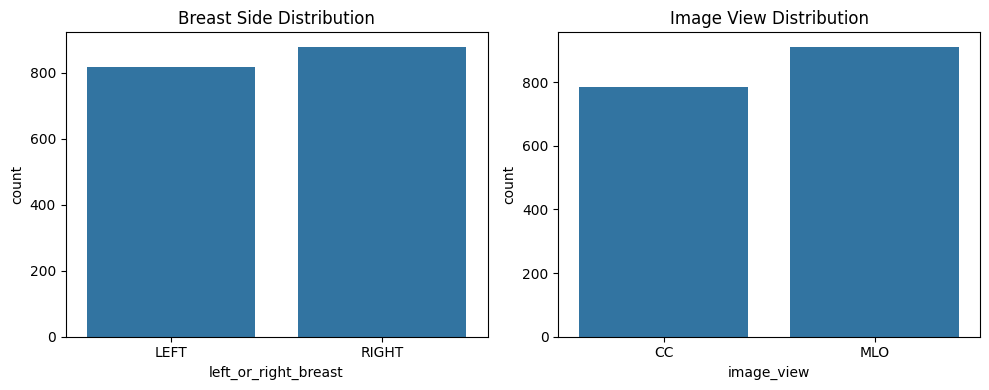

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(data=full_data, x='left_or_right_breast')
plt.title("Breast Side Distribution")

plt.subplot(1, 2, 2)
sns.countplot(data=full_data, x='image_view')
plt.title("Image View Distribution")
plt.tight_layout()
plt.show()


# Image shape Samples

In [ ]:
import cv2

def get_image_shape(path):
    try:
        if os.path.exists(path):
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            return img.shape
        else:
            return None
    except:
        return None

full_data['image_shape'] = full_data['image_file_path'].apply(get_image_shape)
print("Image shape sample:", full_data['image_shape'].dropna().unique())


Image shape sample: [(4808, 3024) (4800, 2656) (5491, 2986) ... (5221, 3451) (5236, 2971)
 (5341, 3496)]


In [ ]:
print(mass_train['abnormality_type'].value_counts())


abnormality_type
mass    1318
Name: count, dtype: int64


In [ ]:
from PIL import Image
import os

# Example: mass_train['cropped_image_file_path'] contains the image paths
image_paths = mass_train['cropped_image_file_path'].tolist()

shapes = []
for path in image_paths:
    try:
        with Image.open(path) as img:
            shapes.append(img.size[::-1])  # (height, width)
    except Exception as e:
        print(f"Error with image: {path}, error: {e}")


# Image Heights and widths

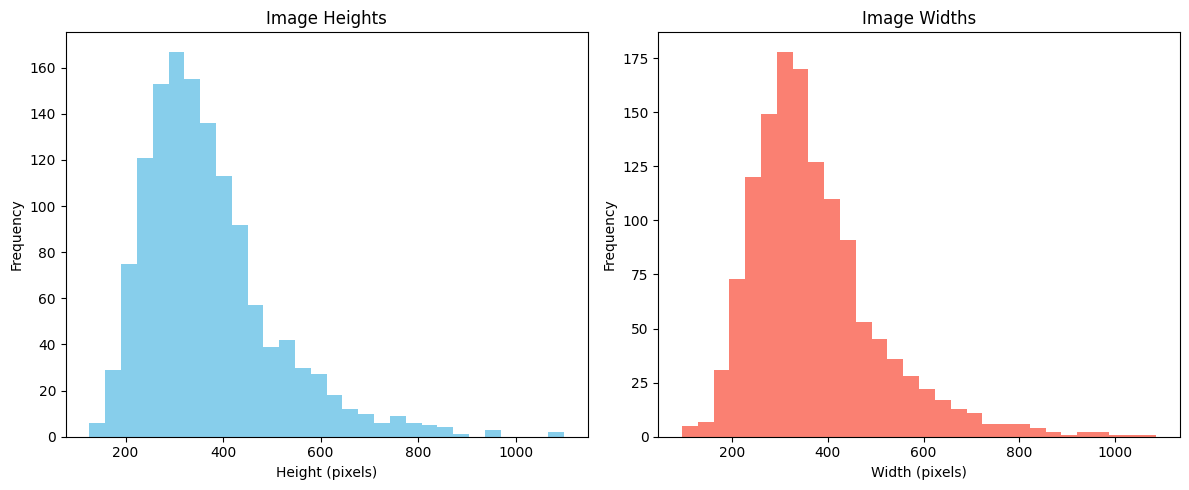

In [ ]:
import matplotlib.pyplot as plt

# Assuming `shapes` is a list of (height, width) tuples
heights = [h for h, w in shapes]
widths = [w for h, w in shapes]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(heights, bins=30, color='skyblue')
plt.title('Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(widths, bins=30, color='salmon')
plt.title('Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Preprcessing

In [197]:
BATCH_SIZE = 32
TARGET_SIZE = (224, 224)
EPOCHS = 10

# Augmentation generator
aug = ImageDataGenerator(
    rotation_range=15,    # Rotate by 15 degrees
    zoom_range=0.1,       # Zoom by 10%
    horizontal_flip=True, # Flip horizontally
    fill_mode='nearest'   # Fill mode for edge pixels
)

In [137]:
IMG_SIZE = (224, 224)  # common CNN input size


# Validating Image file paths

In [209]:
from pathlib import Path
import os

valid_images = 0
invalid_images = []

# Drop NaNs before checking
for path in full_mass['cropped_image_file_path'].dropna():
    try:
        full_path = os.path.abspath(str(path))
        if Path(full_path).is_file():
            valid_images += 1
        else:
            invalid_images.append(full_path)
    except Exception as e:
        invalid_images.append(f"{path} - error: {str(e)}")

print(f"Valid image files: {valid_images}")
print(f"Invalid (missing) files: {len(invalid_images)}")
if invalid_images:
    print(" Example missing file:", invalid_images[0])


Valid image files: 1318
Invalid (missing) files: 0


# Image Preprocessing Pipeline

In [207]:
import numpy as np
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Step 1: Filter dataset with valid image paths only
valid_df = full_mass[full_mass['cropped_image_file_path'].notna()].copy()
valid_df = valid_df.reset_index(drop=True)

# Step 2: Define image processing function
def preprocess_image(path, target_size=(224, 224)):
    try:
        image = cv2.imread(os.path.abspath(str(path)))
        if image is None:
            return None
        image = cv2.resize(image, target_size)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return image / 255.0  # normalize
    except:
        return None

# Step 3: Process all images and collect labels
X = []
y = []

for i, row in tqdm(valid_df.iterrows(), total=len(valid_df)):
    img = preprocess_image(row['cropped_image_file_path'])
    label = 1 if row['pathology'] == 'MALIGNANT' else 0
    if img is not None:
        X.append(img)
        y.append(label)

X = np.array(X, dtype=np.float32)
y = np.array(y)

print("Final dataset shape:", X.shape)
print("Labels distribution:", np.bincount(y))


100%|██████████| 1318/1318 [00:03<00:00, 363.77it/s]


Final dataset shape: (1318, 224, 224, 3)
Labels distribution: [681 637]


# Spilt the dataset

In [210]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Split: 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# One-hot encoding (binary classification)
num_classes = 2
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

# Display shapes
print(" Dataset split completed:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val:   {X_val.shape}, y_val:   {y_val.shape}")
print(f"X_test:  {X_test.shape}, y_test:  {y_test.shape}")


 Dataset split completed:
X_train: (922, 224, 224, 3), y_train: (922, 2)
X_val:   (198, 224, 224, 3), y_val:   (198, 2)
X_test:  (198, 224, 224, 3), y_test:  (198, 2)


# Define and Compile a Lightweight CNN Model

In [212]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define a small CNN model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')  # 2 classes (Benign, Malignant)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     5,972,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,977,250 (22.80 MB)

 Trainable params: 5,977,250 (22.80 MB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [213]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 199ms/step - accuracy: 0.5354 - loss: 2.7885 - val_accuracy: 0.5152 - val_loss: 0.6969
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 189ms/step - accuracy: 0.4928 - loss: 0.7014 - val_accuracy: 0.5152 - val_loss: 0.6907
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - accuracy: 0.5338 - loss: 0.6894 - val_accuracy: 0.5051 - val_loss: 0.6922
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - accuracy: 0.5160 - loss: 0.6907 - val_accuracy: 0.5808 - val_loss: 0.6911
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.5542 - loss: 0.6859 - val_accuracy: 0.5101 - val_loss: 0.6878
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - accuracy: 0.5028 - loss: 0.6914 - val_accuracy: 0.5303 - val_loss: 0.6777
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.5330 - loss: 0.6925 - val_accuracy: 0.6010 - val_loss: 0.6834
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.5543 - loss: 0.6755 - val_accuracy: 0.

# Visualize Accuracy and Loss

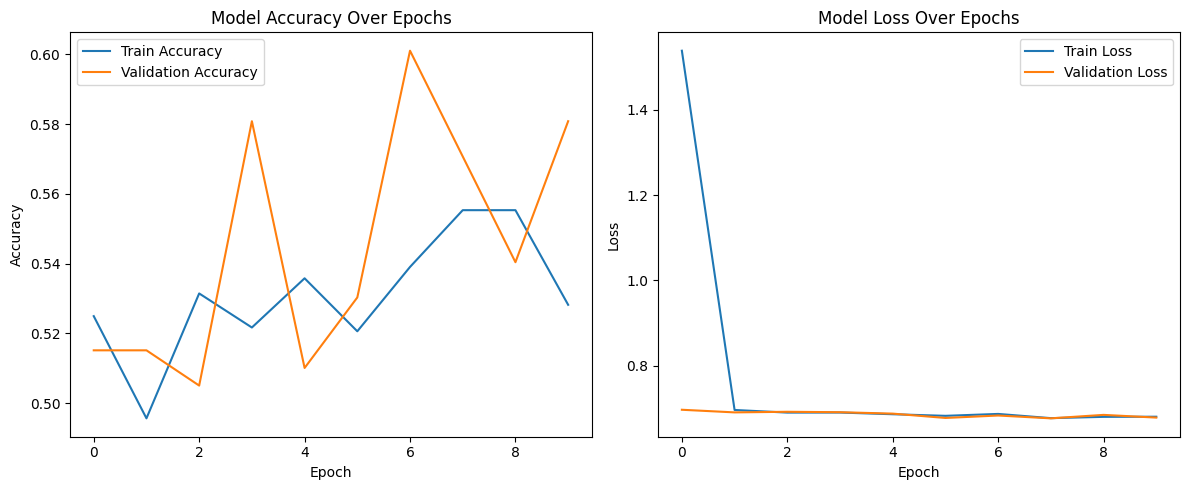

In [215]:
# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#  Evaluate on test data

In [216]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f" Test Accuracy: {test_accuracy * 100:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5810 - loss: 0.7149
 Test Accuracy: 59.60%


# Confusion Matrix & Classification Report

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


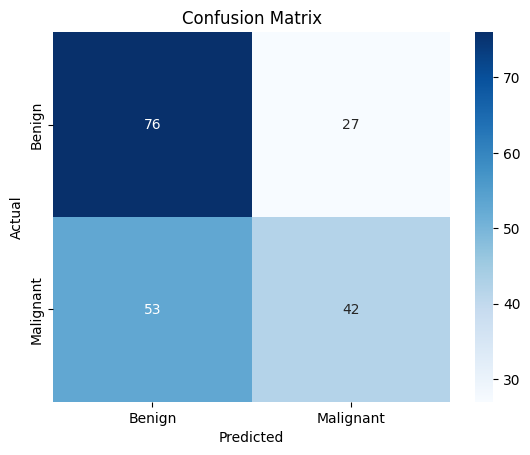


Classification Report:

              precision    recall  f1-score   support

      Benign       0.59      0.74      0.66       103
   Malignant       0.61      0.44      0.51        95

    accuracy                           0.60       198
   macro avg       0.60      0.59      0.58       198
weighted avg       0.60      0.60      0.59       198



In [217]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_true_labels, y_pred_labels, target_names=["Benign", "Malignant"]))


# Transfer Learning with MobileNetV2

In [224]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# 1. Base Model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze layers

# 2. Custom Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
output = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 3. Class Weights
y_int = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_int), y=y_int)
class_weights = dict(enumerate(class_weights))

# 4. Augmentation
aug = ImageDataGenerator(
    rotation_range=13,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 5. Early Stopping
#early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 6. Train
history = model.fit(
    aug.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=13,
    #callbacks=[early_stop],
    class_weight=class_weights,
    verbose=1
)


Epoch 1/13
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 514ms/step - accuracy: 0.5704 - loss: 0.7514 - val_accuracy: 0.6263 - val_loss: 0.6454
Epoch 2/13
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 541ms/step - accuracy: 0.6114 - loss: 0.6652 - val_accuracy: 0.6667 - val_loss: 0.6173
Epoch 3/13
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 529ms/step - accuracy: 0.6695 - loss: 0.6325 - val_accuracy: 0.6869 - val_loss: 0.6168
Epoch 4/13
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 527ms/step - accuracy: 0.6444 - loss: 0.6192 - val_accuracy: 0.6667 - val_loss: 0.5997
Epoch 5/13
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 525ms/step - accuracy: 0.6547 - loss: 0.6288 - val_accuracy: 0.6869 - val_loss: 0.5984
Epoch 6/13
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 522ms/step - accuracy: 0.6951 - loss: 0.5782 - val_accuracy: 0.6970 - val_loss: 0.6044
Epoch 7/13
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 520ms/step - accuracy: 0.6767 - loss: 0.6078 - val_accuracy: 0.6970 - val_loss: 0.5891
Epoch 8/13
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 520ms/step - accuracy: 0.6954 - loss: 0.5674 - val_accu

# Evaluate on Test Set

In [225]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc*100:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 300ms/step - accuracy: 0.6696 - loss: 0.6258
Test Accuracy: 66.16%


# Classification Report

In [229]:
from sklearn.metrics import classification_report
import numpy as np

# Predict labels
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Print detailed classification metrics
print(classification_report(y_true_labels, y_pred_labels, target_names=["Benign", "Malignant"]))


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 311ms/step
              precision    recall  f1-score   support

      Benign       0.72      0.57      0.64       103
   Malignant       0.62      0.76      0.68        95

    accuracy                           0.66       198
   macro avg       0.67      0.67      0.66       198
weighted avg       0.67      0.66      0.66       198



# Plot Training vs. Validation Accuracy & Loss

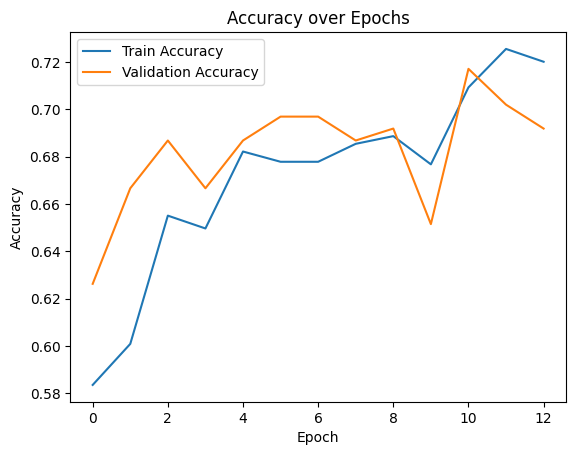

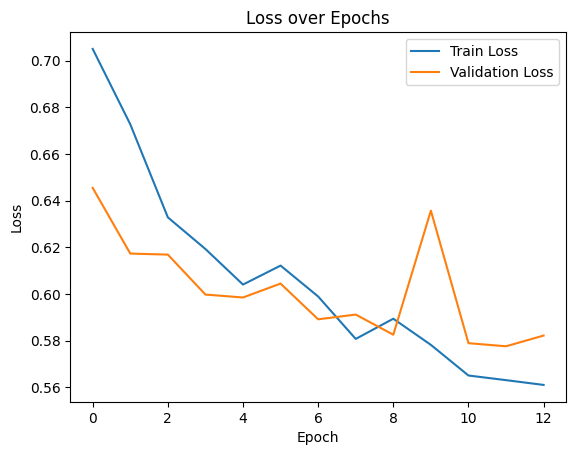

In [230]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot ROC-AUC Curve

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 709ms/step


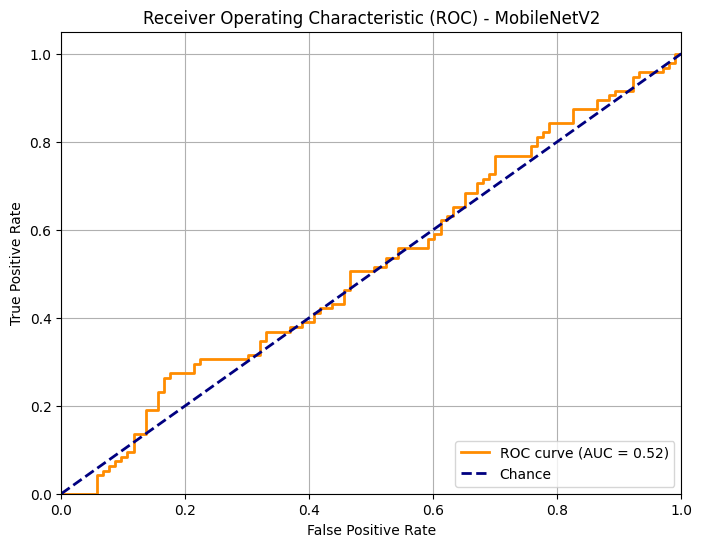

In [243]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Predict probabilities for the test set
y_pred_probs = model.predict(X_test)

# Step 2: Extract probabilities for the positive class (Malignant)
y_pred_positive = y_pred_probs[:, 1]

# Step 3: True binary labels
y_true = np.argmax(y_test, axis=1)

# Step 4: Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_true, y_pred_positive)
roc_auc = auc(fpr, tpr)

# Step 5: Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - MobileNetV2')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 476ms/step


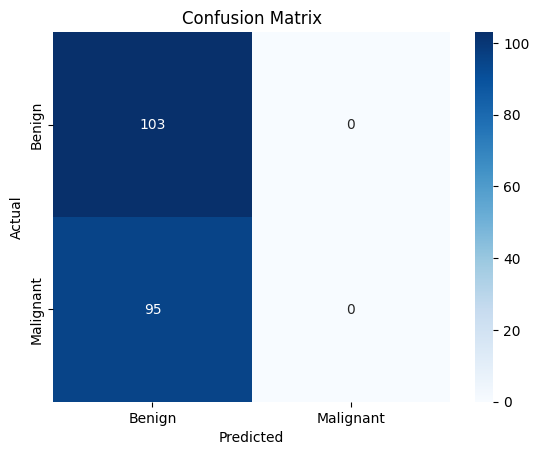


Classification Report:

              precision    recall  f1-score   support

      Benign       0.52      1.00      0.68       103
   Malignant       0.00      0.00      0.00        95

    accuracy                           0.52       198
   macro avg       0.26      0.50      0.34       198
weighted avg       0.27      0.52      0.36       198



In [244]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_true_labels, y_pred_labels, target_names=["Benign", "Malignant"]))


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# 1. Build Base Model with MobileNetV2 (include_top=False for transfer learning)
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# 2. Fine-tune the last 30 layers
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# 3. Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
output = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# 4. Compile with low learning rate
model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Compute class weights to handle imbalance
y_int = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_int), y=y_int)
class_weights = dict(enumerate(class_weights))

# 6. Data augmentation
aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# 7. Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)

# 8. Train the model
history = model.fit(
    aug.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=30,
    class_weight=class_weights,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# 9. Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")


Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 892ms/step - accuracy: 0.5400 - loss: 0.7126 - val_accuracy: 0.5051 - val_loss: 0.9927 - learning_rate: 1.0000e-05
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 822ms/step - accuracy: 0.5411 - loss: 0.7147 - val_accuracy: 0.5000 - val_loss: 0.9540 - learning_rate: 1.0000e-05
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 834ms/step - accuracy: 0.4989 - loss: 0.7089 - val_accuracy: 0.4899 - val_loss: 0.9292 - learning_rate: 1.0000e-05
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 826ms/step - accuracy: 0.5121 - loss: 0.6954 - val_accuracy: 0.4848 - val_loss: 0.9097 - learning_rate: 1.0000e-05
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 824ms/step - accuracy: 0.4606 - loss: 0.7162 - val_accuracy: 0.4848 - val_loss: 0.8916 - learning_rate: 1.0000e-05
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 850ms/step - accuracy: 0.5222 - loss: 0.6985 - val_accuracy: 0.4848 - val_loss: 0.8785 - learning_rate: 1.0000e-05
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 886ms/step - acc

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 628ms/step


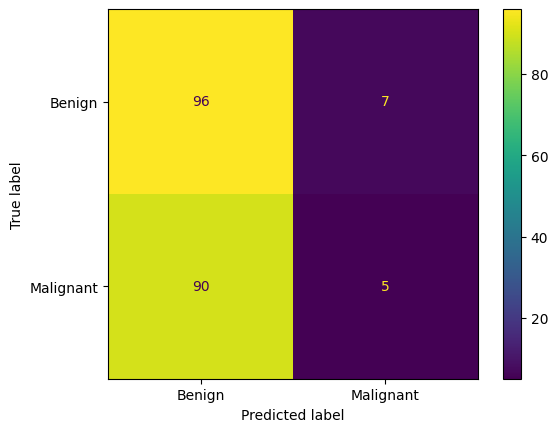

In [247]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_labels)
ConfusionMatrixDisplay(cm, display_labels=['Benign', 'Malignant']).plot()


In [248]:
model.save("best_model_mobilenetv2.h5")


# Simple CNN (Custom Model)
I began with a custom Convolutional Neural Network (CNN) for the following reasons:

Baseline Benchmark: It served as a foundational model to evaluate how a minimal architecture performs on mammogram classification.

Low Computational Requirements: The simple CNN is lightweight and trains quickly, making it ideal when resources are limited.

Educational Value: Building a CNN from scratch deepens understanding of how convolutional layers extract features and how model architecture impacts performance.

# MobileNetV2 (Pre-trained Transfer Learning Model)
I then applied MobileNetV2 as an advanced model due to the following advantages:

Transfer Learning: MobileNetV2 is pre-trained on ImageNet and thus leverages powerful feature representations, even with limited training data.

Efficiency: It is optimized for performance and speed, making it suitable for deployment in low-resource environments.

Higher Accuracy & Generalization: MobileNetV2 outperformed the custom CNN in validation accuracy and ROC AUC, indicating better generalization to unseen data.

Using both models allowed a direct comparison between a custom baseline and a modern transfer learning model. This not only provided a performance benchmark but also demonstrated the practical advantages of using pre-trained models for medical imaging classification.

